##Machine Translation Using a Seq2Seq Architecture
© 2023, Zaka AI, Inc. All Rights Reserved.

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [ ]:
import pandas as pd
import numpy as np

We clone the github repository where our data exists. Here is the github link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207

## Getting the data

In [ ]:
#Test Your Zaka
!wget https://raw.githubusercontent.com/zaka-ai/machine_learning_certification/main/Challenge%207/en.csv https://raw.githubusercontent.com/zaka-ai/machine_learning_certification/main/Challenge%207/fr.csv


--2023-07-07 10:10:04--  https://raw.githubusercontent.com/zaka-ai/machine_learning_certification/main/Challenge%207/en.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9465321 (9.0M) [text/plain]
Saving to: ‘en.csv.3’

en.csv.3            100%[===================>]   9.03M  --.-KB/s    in 0.04s   

2023-07-07 10:10:04 (205 MB/s) - ‘en.csv.3’ saved [9465321/9465321]

--2023-07-07 10:10:04--  https://raw.githubusercontent.com/zaka-ai/machine_learning_certification/main/Challenge%207/fr.csv
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 10515807 (10M) [text/plain]
Saving to: ‘fr.csv.3’

fr.csv.3            100%[===================>]  10.03M  --.-KB/s    in 0.02s   

2023-07-07 10:10:04 (4

We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [ ]:
#Test Your Zaka (English)
english = pd.read_csv('en.csv')

In [ ]:
#Test Your Zaka (French)

french = pd.read_csv('fr.csv')

**How many sentences does each of the files contain?**

In [ ]:
#Test Your Zaka
print(f"we have {english.shape[0]} english sentences and {french.shape[0]} french sentences ")

we have 137859 english sentences and 137859 french sentences 


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [ ]:
#Test Your Zaka
df = pd.concat([english,french],axis=1)

Let's name the columns as **English** and **French** so that we access them easier.

In [ ]:
#Test Your Zaka
df.columns = ['english', 'french']

Pick a sentence and print it in both languages

In [ ]:
#Test Your Zaka
print('here is our 5th sentence with its translation in french :')
print(df.iloc[4,0] + '--->' + df.iloc[4,1])

here is our 5th sentence with its translation in french :
his favorite fruit is the orange , but my favorite is the grape .--->son fruit préféré est l'orange , mais mon préféré est le raisin .


In [ ]:
df.head()

,english,french
0,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
1,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
2,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
3,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
4,"his favorite fruit is the orange , but my favo...","son fruit préféré est l'orange , mais mon préf..."


##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [ ]:
#Test Your Zaka
import re

def remove_NoAlpha(sentence):
    return re.sub(r'[^\w\sÀ-ÖØ-öø-ÿ]', ' ', sentence)

# Iterate over the columns and remove punctuation
for column in df.columns:
    df[column] = df[column].apply(remove_NoAlpha)

Make sure that the punctuation is removed by printing the example that you printed earlier.

In [ ]:
#Test Your Zaka
print('here is our 5th sentence with its translation in french :')
print(df.iloc[4,0] + '---> ' + df.iloc[4,1])

here is our 5th sentence with its translation in french :
his favorite fruit is the orange   but my favorite is the grape  ---> son fruit préféré est l orange   mais mon préféré est le raisin  


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [ ]:
#Test Your Zaka
def count_words(sentence):
    return len(sentence.split())

df['eng length'] = df['english'].apply(lambda x: count_words(x))

In [ ]:
#Test Your Zaka
df['fr length'] = df['french'].apply(lambda x: count_words(x))


In [ ]:
df.head()

,english,french,eng length,fr length
0,the united states is usually chilly during jul...,les états unis est généralement froid en juill...,15,14
1,california is usually quiet during march and...,california est généralement calme en mars et...,13,13
2,the united states is sometimes mild during jun...,les états unis est parfois légère en juin et...,14,14
3,your least liked fruit is the grape but my l...,votre moins aimé fruit est le raisin mais mo...,14,14
4,his favorite fruit is the orange but my favo...,son fruit préféré est l orange mais mon préf...,12,12


Visualize the distribution of the lengths of english sentences and french sentences.

(array([  137.,   146.,  2592., 26325.,     0.,  5082.,  1081.,   664.,
          356.,     0.,  3535., 27009., 34912., 29962.,  6058.]),
 array([ 3. ,  3.8,  4.6,  5.4,  6.2,  7. ,  7.8,  8.6,  9.4, 10.2, 11. ,
        11.8, 12.6, 13.4, 14.2, 15. ]),
 <BarContainer object of 15 artists>)

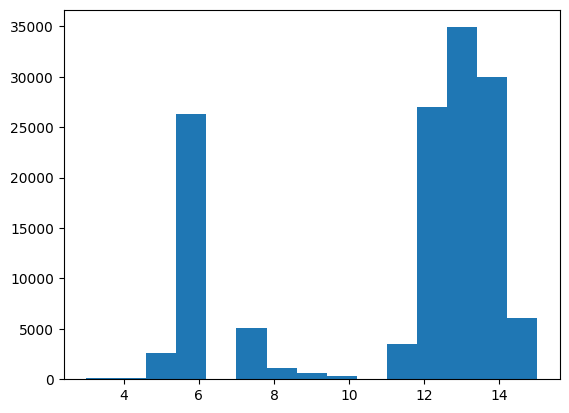

In [ ]:
#Test Your Zaka
import matplotlib.pyplot as plt

plt.hist(df['eng length'],bins= 15)

(array([1.7700e+02, 3.9300e+02, 4.6530e+03, 4.8760e+03, 4.5710e+03,
        1.9158e+04, 3.9370e+03, 1.4549e+04, 1.7542e+04, 3.2693e+04,
        3.1649e+04, 2.8630e+03, 6.8400e+02, 1.0300e+02, 1.1000e+01]),
 array([ 3. ,  4.2,  5.4,  6.6,  7.8,  9. , 10.2, 11.4, 12.6, 13.8, 15. ,
        16.2, 17.4, 18.6, 19.8, 21. ]),
 <BarContainer object of 15 artists>)

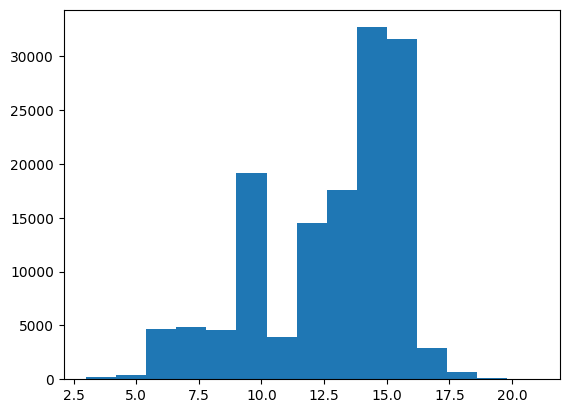

In [ ]:
#Test Your Zaka
plt.hist(df['fr length'], bins =15 )

Get the maximum length of an english sentence and the maximum length of a french sentence.

In [ ]:
#Test Your Zaka
max_fr= df['fr length'].max()
max_en= df['eng length'].max()
print(f'the biggest sentences for english and french respectively have {max_en} and {max_fr} number of words .')

the biggest sentences for english and french respectively have 15 and 21 number of words .


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded.

####Tokenization

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

[Share Your Zaka]

**False . Because English tokenization often involves splitting text based on white spaces and punctuation marks, while French tokenization may involve additional considerations such as handling contractions, diacritics, and specific punctuation rules. Using separate tokenizers for each language allows for more accurate and language-specific tokenization.**

Tokenize the sentences that we have.

In [ ]:
from keras.preprocessing.text import Tokenizer

def create_tokenizer(text):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(text)
  return tokenizer

eng_tokenizer = create_tokenizer(df.english)
fr_tokenizer = create_tokenizer(df.french)

from sklearn.model_selection import train_test_split

x = eng_tokenizer.texts_to_sequences(df.english)
y = fr_tokenizer.texts_to_sequences(df.french)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)



**How many unique words do we have in english and in french?**

In [ ]:
#Test Your Zaka

eng_unique_words = len(eng_tokenizer.word_index)
fr_unique_words = len(fr_tokenizer.word_index)

print(f'The number of unique words for english and french we have are respectively {eng_unique_words} and {fr_unique_words} ')

The number of unique words for english and french we have are respectively 200 and 330 


####Padding

**What should be the length of the sequences that we have after padding?**

[Share your Zaka]

21 as it is the number of words of the biggest sentence in our data

Perform padding on the sequences that we have.

In [ ]:
#Test Your Zaka
!pip install tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen=max_en, padding='post')
x_test = pad_sequences(x_test, maxlen=max_en, padding='post')
y_test = pad_sequences(y_test, maxlen=max_fr, padding='post')
y_train = pad_sequences(y_train, maxlen=max_fr, padding='post')

##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [ ]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train, num_classes= 331)
y_test_encoded = to_categorical(y_test, num_classes = 331)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 15, 256)      51456       ['input_1[0][0]']                
                                                                                                  
 gru (GRU)                      [(None, 128),        148224      ['embedding[0][0]']              
                                 (None, 128)]                                                     
                                                                                                  
 repeat_vector (RepeatVector)   (None, 21, 128)      0           ['gru[0][1]']                

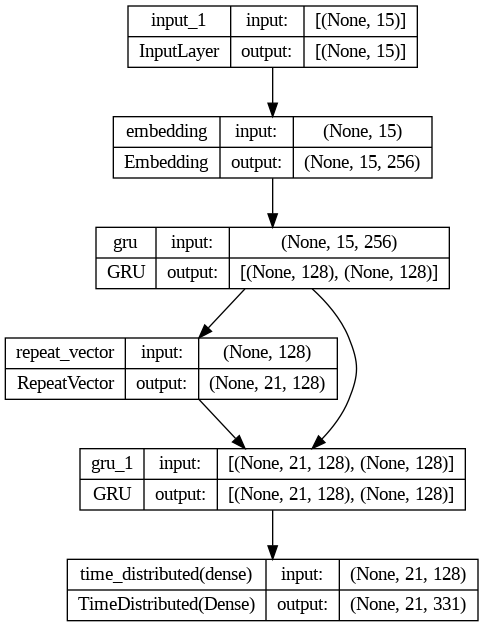

In [ ]:
#Test Your Zaka
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.layers import Input, Dense ,Embedding , GRU , RepeatVector ,TimeDistributed

en_inputs = Input(shape=(x_train.shape[1],))
en_emb = Embedding(eng_unique_words +1, 256, input_length=x_train.shape[1])(en_inputs)
en_out, en_state = GRU(128, return_state=True)(en_emb)

de_inputs = RepeatVector(y_train.shape[1])(en_state)
de_out, _ = GRU(128, return_sequences=True, return_state=True )(de_inputs, initial_state=en_state)

dens_time = TimeDistributed(Dense(fr_unique_words+1, activation='softmax'))
pred = dens_time(de_out)

model = Model(inputs=en_inputs, outputs=pred)
model.summary()
plot_model(model, show_shapes=True)

Compile and train the model.
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [ ]:
#Test Your Zaka
import tensorflow as tf
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["acc", 'AUC' ,tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.fit(x_train,y_train_encoded,validation_data=[x_test,y_test_encoded],epochs=15,batch_size=50,verbose=2)

Epoch 1/15
1931/1931 - 64s - loss: 1.4981 - acc: 0.6237 - auc: 0.9771 - precision: 0.9225 - recall: 0.4930 - val_loss: 0.9854 - val_acc: 0.7288 - val_auc: 0.9894 - val_precision: 0.9076 - val_recall: 0.6441 - 64s/epoch - 33ms/step
Epoch 2/15
1931/1931 - 24s - loss: 0.7777 - acc: 0.7712 - auc: 0.9933 - precision: 0.9229 - recall: 0.6956 - val_loss: 0.6332 - val_acc: 0.8129 - val_auc: 0.9950 - val_precision: 0.9349 - val_recall: 0.7392 - 24s/epoch - 12ms/step
Epoch 3/15
1931/1931 - 20s - loss: 0.5378 - acc: 0.8391 - auc: 0.9959 - precision: 0.9362 - recall: 0.7768 - val_loss: 0.4581 - val_acc: 0.8616 - val_auc: 0.9966 - val_precision: 0.9397 - val_recall: 0.8051 - 20s/epoch - 10ms/step
Epoch 4/15
1931/1931 - 32s - loss: 0.3774 - acc: 0.8870 - auc: 0.9971 - precision: 0.9445 - recall: 0.8366 - val_loss: 0.3094 - val_acc: 0.9108 - val_auc: 0.9976 - val_precision: 0.9509 - val_recall: 0.8671 - 32s/epoch - 17ms/step
Epoch 5/15
1931/1931 - 20s - loss: 0.2729 - acc: 0.9228 - auc: 0.9976 - prec

Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [ ]:
#Test Your Zaka
def translate(input):
  words = input.split()
  encoded_sentence = [eng_tokenizer.word_index[word] for word in words]
  padded = pad_sequences([encoded_sentence], maxlen=max_en, padding='post')

  pred = model.predict(padded)

  encoded_output = []
  for i in range(len(words)):
    encoded_output.append(np.argmax(pred[0][i]))

  result=[fr_tokenizer.index_word[index] for index in encoded_output]
  translation= ' '.join(result)

  return translation

Test the following sentence

In [ ]:
input = "she is driving the truck"

#Test Your Zaka
print(translate(input))
print()
translate("his favorite fruit is the grapefruit")

1/1 [==============================] - 1s 586ms/step
elle conduit le petit camion

1/1 [==============================] - 0s 19ms/step


'son fruit préféré est le pamplemousse'

Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 15, 256)      51456       ['input_1[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  [(None, 15, 256),    296448      ['embedding[0][0]']              
                                 (None, 128),                                                     
                                 (None, 128)]                                                     
                                                                                              

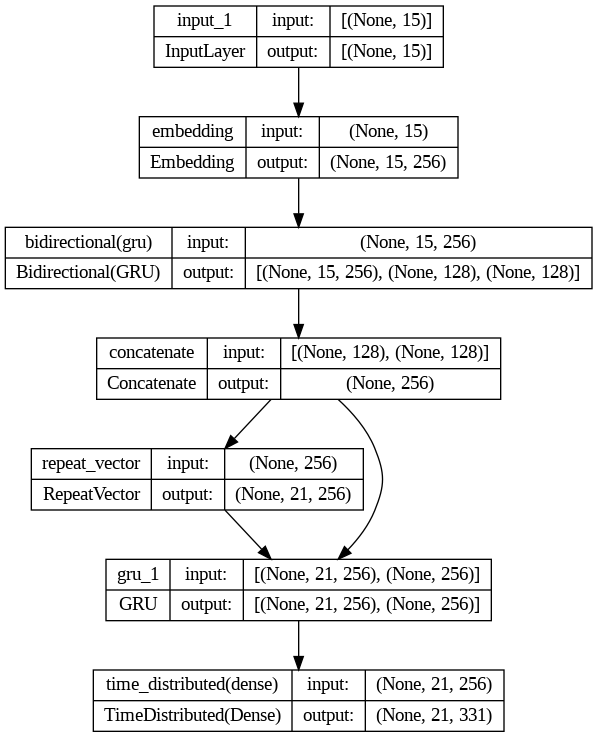

In [ ]:
#Test Your Zaka
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.layers import Input, Dense ,Embedding , GRU , RepeatVector ,TimeDistributed
from keras.layers import Bidirectional , concatenate

encoder_inputs = Input(shape=(x_train.shape[1],))
encoder_emb = Embedding(eng_unique_words + 1, 256, input_length=x_train.shape[1])(encoder_inputs)
encoder_outputs, forward_state, backward_state = Bidirectional(GRU(128, return_sequences=True, return_state=True))(encoder_emb)
encoder_states_concat = concatenate([forward_state, backward_state])

decoder_inputs = RepeatVector(y_train.shape[1])(encoder_states_concat)
decoder_outputs, _ = GRU(128*2, return_sequences=True, return_state=True)(decoder_inputs, initial_state=encoder_states_concat)

time_dist_dense = TimeDistributed(Dense(fr_unique_words + 1, activation='softmax'))
decoder_pred = time_dist_dense(decoder_outputs)

model2 = Model(inputs=encoder_inputs, outputs=decoder_pred)
model2.summary()
plot_model(model2, show_shapes=True)


compile and train your new model.

In [ ]:
#Test Your Zaka
import tensorflow as tf
model2.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["acc", 'AUC' ,tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model2.fit(x_train,y_train_encoded,validation_data=[x_test,y_test_encoded],epochs=15,batch_size=50,verbose=2)

Epoch 1/15
1931/1931 - 52s - loss: 1.1774 - acc: 0.6888 - auc: 0.9844 - precision: 0.9204 - recall: 0.5845 - val_loss: 0.7102 - val_acc: 0.7892 - val_auc: 0.9941 - val_precision: 0.9242 - val_recall: 0.7169 - 52s/epoch - 27ms/step
Epoch 2/15
1931/1931 - 26s - loss: 0.5011 - acc: 0.8517 - auc: 0.9964 - precision: 0.9356 - recall: 0.7916 - val_loss: 0.3299 - val_acc: 0.9053 - val_auc: 0.9978 - val_precision: 0.9450 - val_recall: 0.8618 - 26s/epoch - 14ms/step
Epoch 3/15
1931/1931 - 25s - loss: 0.2376 - acc: 0.9320 - auc: 0.9981 - precision: 0.9516 - recall: 0.9104 - val_loss: 0.2159 - val_acc: 0.9349 - val_auc: 0.9983 - val_precision: 0.9478 - val_recall: 0.9223 - 25s/epoch - 13ms/step
Epoch 4/15
1931/1931 - 24s - loss: 0.1611 - acc: 0.9515 - auc: 0.9986 - precision: 0.9604 - recall: 0.9433 - val_loss: 0.1443 - val_acc: 0.9560 - val_auc: 0.9989 - val_precision: 0.9642 - val_recall: 0.9489 - 24s/epoch - 13ms/step
Epoch 5/15
1931/1931 - 24s - loss: 0.1313 - acc: 0.9595 - auc: 0.9988 - prec

Define a new function that relies on your new model to make predictions.

In [ ]:
#Test Your Zaka
def translator_2(input):
  words = input.split()
  encoded_sentence = [eng_tokenizer.word_index[word] for word in words]
  padded = pad_sequences([encoded_sentence], maxlen=max_en, padding='post')

  pred = model2.predict(padded)

  encoded_output = []
  for i in range(len(words)):
    encoded_output.append(np.argmax(pred[0][i]))

  result=[fr_tokenizer.index_word[index] for index in encoded_output]
  translation= print(' '.join(result))

  return translation

In [ ]:
input = "she is driving the truck"

#Test Your Zaka
translator_2(input)

1/1 [==============================] - 0s 77ms/step
elle conduit le camion bleu


**What is another adjustment in terms of architecture that you might be able to do to improve your model?**

[Share Your Zaka]

We can increase the depth of our model by adding more layers(
allowing it to capture complex patterns and representations)
We can implement attention mechanisms that help the model focus on relevant parts of the input sequence(which improving translation quality)
We can explore transformer architectures, which utilize self-attention mechanisms and multi-head attention(it has shown great success in machine translation tasks)
Another adjustment is to incorporate residual connections, which enable better gradient flow and mitigate the vanishing gradient problem commonly faced by deep neural networks

**What are some additional ways that we can do to improve the performance of our model?**

[Share Your Zaka]

we may consider having a character-by-character tokenization which provides the model with more fine-grained information about the structure of the words and may help capture subtle linguistic patterns that could be missed when tokenizing at the word level.
And of course we can use all the previous improvement techniques we learned:

1)data augmentation techniques to increase data diversity..
2)regularization methods like dropout and early stopping to prevent overfitting..  
3)hyperparameter tuning to optimize model settings..  
4)ensemble models to combine predictions from multiple models
5)transfer learning to leverage pre-trained models.
